When using python, we generally start with importing "modules" which can be thought of as  file consisting of Python code allowing us to perform different tasks.

In [1]:
#import section (Using a # symbol allows you to add comments that are ignored by the code)
import os
# To import files:
from google.colab import files
import io
# To look at the data and analyse it
import pandas as pd
import numpy as np
# To plot the data
import matplotlib.pyplot as plt
# To fit the data
from scipy.optimize import curve_fit

Next we get the data that we want to plot.
For this masterclass exercise, make sure you have fit all the events in your data group for follwing the exercise. Once you have fit all the events, click on save data to get a file names "IceTopData.csv".

Once you have the .csv file run the next line of code which will allow you to upload the file to the notebook.

Note: Make sure the name of the file is "IceTopData.csv", if it is something else rename it to "IceTopData.csv"


# Section 1: Getting the real and simulated data from the IceTopData.csv file

In [2]:
uploaded = files.upload()

Saving IceTopData.csv to IceTopData (3).csv


The next line is to check if the upload was done properly. If the upload worked you should be able to see the table of your event data fits below.

In [3]:
# Loading the data to an object named data_array and sorting it by energy:
data_array = pd.read_csv(io.BytesIO(uploaded['IceTopData.csv']))

data_array = data_array.sort_values(by='Energy', ascending=True)

# Printing the data: (You can use print(data_array) also)
data_array


,S125,Weight,Energy
14,5.449142,65,0.0
26,7.266548,80,0.0
25,12.199109,43,0.0
22,10.872468,12,0.0
21,3.857697,165,0.0
20,3.064278,195,0.0
19,8.636308,25,0.0
18,8.636308,69,0.0
16,18.252742,11,0.0
28,20.479914,5,0.0


Now we filter the data to remove all the rows which have an energy of 0.

The output should show a table with all the rows removed which have an energy value of 0.0. We can used these entries to calibrate the energy of the detector. 


# Section 2: Getting the energy values of real data and then using it to fit the rate.

We now use the S125 data to perform an energy calibration which can be  used to get energy values for the real data. 

This is done using the following steps:

1. Use the S125 and Energy data of the simualtaions (derived using data_array_filtered = data_array[data_array['Energy'] > 0.0]) to make a plot with S125 on the y axis and Energy on the x.
So the xdata=data_array_filtered['Energy'] and ydata=data_array_filtered['S125'].

2. Use a fitting procedure similar to the power law fit described in section 3 to derive the relation between S125 and energy.  

3. Once you have the parameters of the equation use the S125 values to get the calibrated energy values for the real data that was skipped (E=0).


In [4]:
# Getting just the simulated data

# Filtering condition:
data_array_filtered = data_array[data_array['Energy'] > 0.0]

# Print the new dataframe which shows just the simulated data
data_array_filtered 

,S125,Weight,Energy
15,5.772024,89,4116737.0
13,4.856553,125,4128438.5
5,17.231700,239,4865185.0
0,2.731040,79,5029059.5
24,12.199109,58,6404610.0
3,8.636308,94,6515793.0
17,8.636308,78,7326671.5
23,12.199109,91,8941643.0
2,8.636308,69,9492318.0
10,14.498669,67,11138377.0


Text(0, 0.5, 'S125')

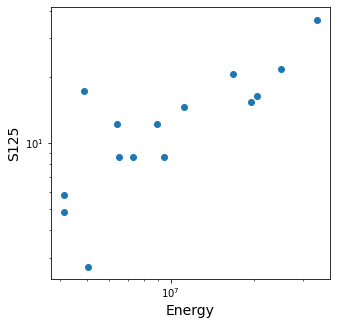

In [5]:
# Plotting S125 vs Energy for the simulated events.
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.scatter(data_array_filtered['Energy'],data_array_filtered['S125'])
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Energy",fontsize=14)
ax1.set_ylabel("S125",fontsize=14)



In [6]:
#Defining  a power law function to fit to the data: (In python x^b is written as x**b)
def power_law(x, n, b):
    return n*(x**(b)) 


In [7]:
# We use the curve_fit function of scipy. Here we give the function to be fit (power_law),
# the xdata=Energy values and the ydata=calculated rate
# We get the parameters (n,b) as one of the outputs and  the estimated covariance of parameters 
# which can be used to determine the standard deviations of the fitting parameters.
# We only require the parameters for this exercise as we are not plotting errors

parameters, covariance = curve_fit(f=power_law, xdata=data_array_filtered['Energy'], ydata=data_array_filtered['S125'])

# The Power-Law fit that you got looks like the following:
print("Power Law Fit Result:\n")
print("Normalization: %.2e \nIndex: %.2f \nEquation:"%(parameters[0],parameters[1]))
print("Y = %.2e X^(%.2f)"%(parameters[0],parameters[1]))

Power Law Fit Result:

Normalization: 4.70e-05 
Index: 0.77 
Equation:
Y = 4.70e-05 X^(0.77)


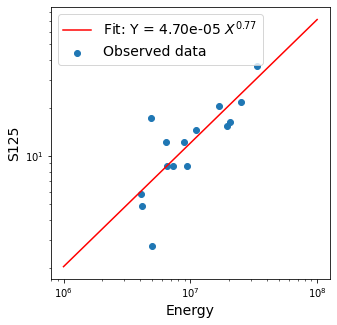

In [8]:
# Now we plot the power law result that you got above":
xvalues_for_powerlaw = np.logspace(6,8,50)
yvalues_from_powerlaw = power_law(xvalues_for_powerlaw,parameters[0],parameters[1])

#Now we plot all the results:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.scatter(data_array_filtered['Energy'],data_array_filtered['S125'],label="Observed data")
ax1.plot(xvalues_for_powerlaw,yvalues_from_powerlaw,color="red",label="Fit: Y = %.2e $X^{%.2f}$"%(parameters[0],parameters[1]))
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Energy",fontsize=14)
ax1.set_ylabel("S125",fontsize=14)
plt.legend(fontsize=14)

In [9]:
# Step 3 in the description, getting real energy values.

# The power law equation is given as y=n x^b, now that we have n and b values given by parameters[0] and parameters[1],
# we can use them to find x as a function of y --> x = (y/n)^(1/b).

data_array_real_events = data_array[data_array['Energy'] == 0.0]

data_array_real_events['Energy']=(data_array_real_events['S125']/parameters[0])**(1/parameters[1])

# Check that all the E=0 events are replaced by enegies
data_array_real_events


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,S125,Weight,Energy
14,5.449142,65,3.578336e+06
26,7.266548,80,5.193166e+06
25,12.199109,43,1.015276e+07
22,10.872468,12,8.747497e+06
21,3.857697,165,2.288652e+06
20,3.064278,195,1.698943e+06
19,8.636308,25,6.493561e+06
18,8.636308,69,6.493561e+06
16,18.252742,11,1.710156e+07
28,20.479914,5,1.984889e+07


# Section 3: Using the real data to fit the rate

We now have to define energy bins for the analysis. You can change this by either varying the bin size or minimum and maximum of the bins. For now we use a defailt value of minimum energy=10^(6.4) and maximum energy=10^(7.6), and 6 bins.

In [10]:
minimum_energy_bin_power=6.4 #log10(E_min)
maximum_energy_bin_power=7.4 #log10(E_max)
number_bins=20 

energy_bins=np.logspace(minimum_energy_bin_power,maximum_energy_bin_power,number_bins+1)


Next we derive the rate from the weight and energy information. This is done by first looking for the number of events in a particular energy bin. Once we know the number of events in a bin, the resultant number is divided by the bin width.

As you are using all the events of one color we will use the exposure given in the guide = 8.186 109 m2 sr s.

In [11]:
# For each bin in energy bin, find the number of events. This is done by first finding the number 
# of rows that fall in the energy bin and then adding the weights.
# For example if we have: 
# 2 events with energy 5 MeV, 
# 3 events with energy 10 MeV and 
# 7 events with energy 12 MeV
# For the first bin (if the energy_bins array = [1,11,21]), minimum and maximum energy is 1 and 11
# Which would give 2+3 events = 5 events in the 1st bin and 7 events in the second (11-21)


rate_array=[]
mean_energy=[]
for i in range(len(energy_bins)):
  if i==len(energy_bins)-1:
    continue
  print("Running Energy Bin: %s \n\t [Emin,Emax]=[%.2e,%.2e]"%(i+1,energy_bins[i],energy_bins[i+1]))
  data_array_min_e_cropped = data_array_real_events[data_array_real_events['Energy'] > energy_bins[i]]
  data_array_max_e_cropped = data_array_min_e_cropped[data_array_min_e_cropped['Energy'] < energy_bins[i+1]]
  print("\t Number of Rows in energy bin  :",len(data_array_max_e_cropped))
  print("\t Number of Events (Weights sum):",data_array_max_e_cropped['Weight'].sum())
  if data_array_max_e_cropped['Weight'].sum()==0:
    print("\t Skipping bin as there are no events \n")
    continue
  # Now that we have the number of events, we divide it by the bin width given by dE= (E_max-E_min)/N or (E[i+1]-E[i]) to get the rate
  rate_bin = data_array_max_e_cropped['Weight'].sum()/(energy_bins[i+1]-energy_bins[i])
  rate_array.append(rate_bin)
  mean_energy.append((energy_bins[i+1]+energy_bins[i])/2) # Mean energy is the midpoint fo the energy bins
  print("\n")
mean_energy=np.asarray(mean_energy)

# Now we divide the events/energy by the exposure to get the final rate array
# exposure:
exposure=8.186e9 #m2 sr s.
#rate (weights/(exposure*energy))
rate=np.asarray(rate_array)/(exposure)

Running Energy Bin: 1 
	 [Emin,Emax]=[2.51e+06,2.82e+06]
	 Number of Rows in energy bin  : 0
	 Number of Events (Weights sum): 0
	 Skipping bin as there are no events 

Running Energy Bin: 2 
	 [Emin,Emax]=[2.82e+06,3.16e+06]
	 Number of Rows in energy bin  : 0
	 Number of Events (Weights sum): 0
	 Skipping bin as there are no events 

Running Energy Bin: 3 
	 [Emin,Emax]=[3.16e+06,3.55e+06]
	 Number of Rows in energy bin  : 0
	 Number of Events (Weights sum): 0
	 Skipping bin as there are no events 

Running Energy Bin: 4 
	 [Emin,Emax]=[3.55e+06,3.98e+06]
	 Number of Rows in energy bin  : 1
	 Number of Events (Weights sum): 65


Running Energy Bin: 5 
	 [Emin,Emax]=[3.98e+06,4.47e+06]
	 Number of Rows in energy bin  : 0
	 Number of Events (Weights sum): 0
	 Skipping bin as there are no events 

Running Energy Bin: 6 
	 [Emin,Emax]=[4.47e+06,5.01e+06]
	 Number of Rows in energy bin  : 1
	 Number of Events (Weights sum): 19


Running Energy Bin: 7 
	 [Emin,Emax]=[5.01e+06,5.62e+06]
	 N

Once the data is filtered and the rate is derived, we will use the information we have to plot the rate. 

Text(0, 0.5, 'Rate')

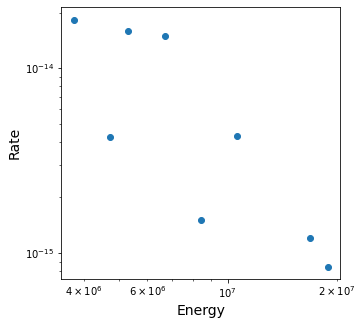

In [12]:
#Just plotting the data to see how it looks like:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.scatter(mean_energy,rate)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Energy",fontsize=14)
ax1.set_ylabel("Rate",fontsize=14)


Next we use the plot to fit a power law.

(A power law is commonly given by the equation Y = n 
X^b, where n is called the normaliztion and b is called 
the index)

In [13]:
# We can use the same power law definition as Section 2 to run this step, However, as we want a negative index, 
# we will define it again using a negative index
def power_law(x, n, b):
    return n*(x**(-1.0*b)) 

# We use the curve_fit function of scipy. Here we give the function to be fit (power_law),
# the xdata=Energy values and the ydata=calculated rate
# We get the parameters (n,b) as one of the outputs and  the estimated covariance of parameters 
# which can be used to determine the standard deviations of the fitting parameters.
# We only require the parameters for this exercise as we are not plotting errors

parameters, covariance = curve_fit(f=power_law, xdata=mean_energy, ydata=rate)

# The Power-Law fit that you got looks like the following:
print("Power Law Fit Result:\n")
print("Normalization: %.2e \nIndex: -%.2f \nEquation:"%(parameters[0],parameters[1]))
print("Y = %.2e X^(-%.2f)"%(parameters[0],parameters[1]))


Power Law Fit Result:

Normalization: 1.05e-05 
Index: -1.34 
Equation:
Y = 1.05e-05 X^(-1.34)


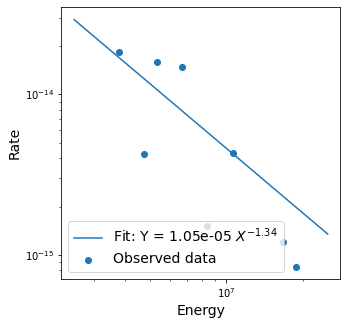

In [14]:
# Now we plot the power law result that you got above":
# First we make a set of energy values and the corresponding Y values derived from the powerlaw function
energy_for_powerlaw = energy_bins
rate_from_powerlaw = power_law(energy_for_powerlaw,parameters[0],parameters[1])

#Now we plot all the results:
fig = plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.scatter(mean_energy,rate,label="Observed data")
ax1.plot(energy_for_powerlaw,rate_from_powerlaw,label="Fit: Y = %.2e $X^{-%.2f}$"%(parameters[0],parameters[1]))
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("Energy",fontsize=14)
ax1.set_ylabel("Rate",fontsize=14)
plt.legend(fontsize=14)


Note: If the fit that you got does not appear very good, more data points are needed. This can be done by running the optional section given below.

# Optional analysis: 
Run all the events for all the different coloured groups to get all the simulated and real data. Once you have that you can re-run the above analysis to get a result similar to the one shown in the research paper given online.


Once you have that, Congratulations! You were able to reproduce a particular research finding of the IceCube Collaboration, published in Physical Review D in August 2013. 